<a href="https://colab.research.google.com/github/ajit-ai/DataScience/blob/main/Types_of_Clustering_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Types of Clustering Algorithms

Partitioning Clustering Algorithms
Partitioning algorithms divide the data into non-overlapping subsets or clusters. They are efficient and suitable for large datasets.
1) K-means Clustering:

Working:
K-means is an iterative clustering algorithm that aims to partition a set of data points into K clusters.
The algorithm starts by selecting K initial cluster centroids randomly.
Then, it iteratively assigns each data point to the nearest centroid and recalculates the centroids based on the mean of the data points assigned to each centroid.
This process continues until convergence, where the assignments of data points to clusters stabilize.
Advantages:
- Simple and intuitive.
- Efficient and works well on large datasets.
- Easily adaptable to various domains.
Disadvantages:
- Sensitive to the initial placement of centroids.
- Requires prior knowledge of the number of clusters (K).
- Prone to converge to a local minimum.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Sample data (replace this with your actual data)
data = np.array([[1, 2], [1, 4], [1, 0],
               [10, 2], [10, 4], [10, 0]])

# Create a KMeans instance with desired number of clusters (n_clusters)
kmeans = KMeans(n_clusters=3)

# Fit the data to the KMeans model
kmeans.fit(data)

# Get cluster labels for each data point
labels = kmeans.labels_

print(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 2 0 0 0]


2) K-means++:
Working:
K-means++ is an improvement over K-means that provides a smarter initialization for centroids. It uses a probabilistic approach to select the initial centroids in a way that they are more spread out and likely to be close to the true centroids.
Advantages:
- Reduces the chances of converging to a local minimum.
- Generally gives better results than the standard K-means.
Disadvantages:
- Slightly more computationally intensive due to the additional initialization step.

In [ ]:
from sklearn.cluster import KMeans

# Create a KMeans instance with desired number of clusters (n_clusters) and init='k-means++'

kmeans = KMeans(n_clusters=3, init='k-means++')

# Fit the data to the KMeans model

kmeans.fit(data)

# Get cluster labels for each data point

labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Mini-batch K-means:
Working:
Mini-batch K-means is a variation of K-means that processes small random subsets of the data (mini-batches) to update the centroids. This makes it computationally faster and more scalable than the standard K-means.
Advantages:
- Faster convergence and reduced computational cost, especially for large datasets.
- Suitable for streaming or online clustering.
Disadvantages:
- Sensitive to the size of mini-batches and learning rate.
- May not converge as accurately as standard K-means.

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Create a MiniBatchKMeans instance with desired number of clusters (n_clusters)

mini_batch_kmeans = MiniBatchKMeans(n_clusters=3)

# Fit the data to the MiniBatchKMeans model

mini_batch_kmeans.fit(data)

# Get cluster labels for each data point

labels = mini_batch_kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


When to Use Each Algorithm:
- Use K-means when you have a moderate-sized dataset and a good estimate of the number of clusters.
- Use K-means++ when you want a more robust initialization of centroids for K-means.
- Use Mini-batch K-means when dealing with large datasets and computational efficiency is a priority, or when working with streaming data.

Hierarchical Clustering Algorithms
What is Hierarchical Clustering?
Hierarchical Clustering is a clustering technique that builds a hierarchy of clusters. It starts by considering each data point as a separate cluster and then merges or splits clusters iteratively based on a similarity measure. The result is a dendrogram, a tree-like structure that illustrates the arrangement of the clusters.
Types of Hierarchical Clustering:

Hierarchical Clustering can be broadly categorized into two types based on the approach used to merge or split clusters:
1. Agglomerative Hierarchical Clustering: It starts with each data point as a separate cluster and merges the most similar clusters at each step until only one cluster remains.
2. Divisive Hierarchical Clustering: It begins with all data points in one cluster and splits the least similar clusters at each step until each data point is in its own cluster.
How Agglomerative Hierarchical Clustering Works:
Agglomerative Hierarchical Clustering initially considers each data point as a single cluster. It then iteratively merges the two closest clusters based on a distance metric (e.g., Euclidean distance) until only one cluster, encompassing all data points, remains.


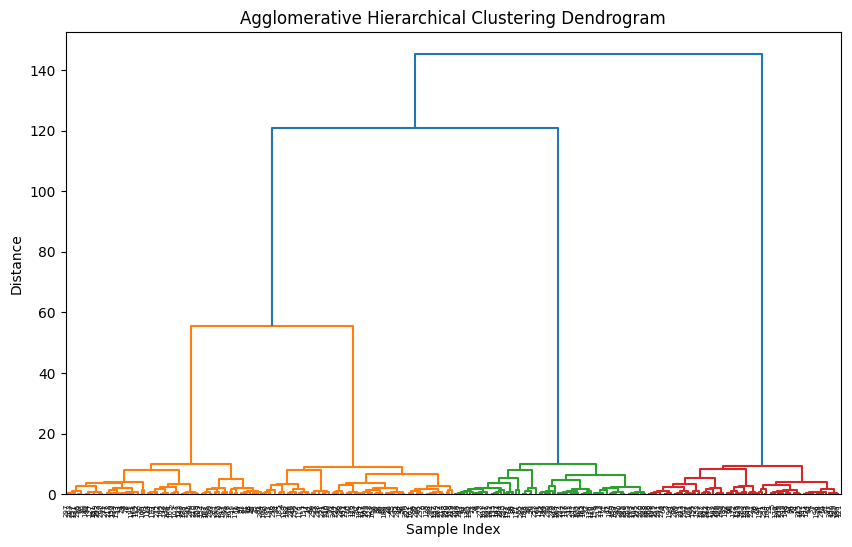

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs  # Import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Perform agglomerative hierarchical clustering
linked = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

How Divisive Hierarchical Clustering Works:
Divisive Hierarchical Clustering starts with all data points in a single cluster. It then iteratively splits the least similar cluster into two based on a chosen criterion (e.g., maximum dissimilarity) until each data point is in its own cluster.

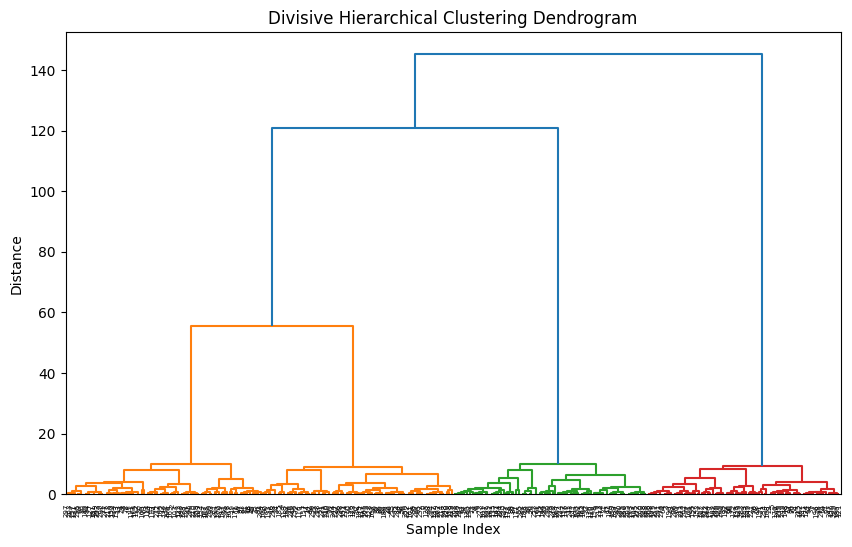

In [ ]:
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.datasets import make_blobs  # Correct import

# Generate sample data

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)  # Use correct function name

# Perform divisive hierarchical clustering

linked = linkage(X, 'ward')

clusters = fcluster(linked, t=6, criterion='distance')

# Plot the dendrogram

plt.figure(figsize=(10, 6))

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

plt.title('Divisive Hierarchical Clustering Dendrogram')

plt.xlabel('Sample Index')

plt.ylabel('Distance')

plt.show()

Elbow Method: Plotting the variance (or inertia) explained as a function of the number of clusters and identifying the 'elbow point' provides a good estimate of the optimal number of clusters.
Advantages of Hierarchical Clustering:
No predefined number of clusters: Hierarchical Clustering does not require specifying the number of clusters beforehand, making it suitable for exploratory data analysis.
Interpretability: The dendrogram provides a clear visualization of the clustering structure, aiding in understanding the relationships between data points.
Hierarchy of clusters: It offers a more nuanced view of the data by illustrating clusters at various levels of granularity.
Disadvantages of Hierarchical Clustering:
Computational Complexity: Hierarchical Clustering can be computationally intensive, especially for large datasets.
Sensitivity to Noise: Outliers and noise can significantly affect the clustering outcome in Hierarchical Clustering.
Difficulty with Large Datasets: Analyzing large datasets can be challenging due to the computational and visualization complexities.
When to Use Hierarchical Clustering:
Understanding Data Structure: Hierarchical Clustering is ideal for exploratory analysis, helping to comprehend the inherent structure of the data.
Small to Medium-sized Datasets: It works well with small to medium-sized datasets, where the computational cost is manageable.
When No Prior Knowledge of Clusters: When the number of clusters is unknown or the data's underlying structure is unclear, Hierarchical Clustering is a great starting point.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

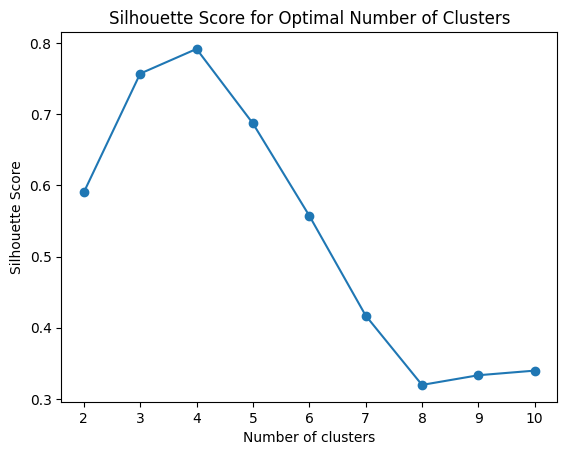

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Assume X is your data

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters
    clusterer = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))

# Plot the Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()

Density-Based Clustering Algorithms
Density-Based Clustering Algorithms operate on the principle that a cluster in a dataset is a dense region of data points separated by areas of lower point density. Unlike partitioning algorithms like k-means that require specifying the number of clusters beforehand, density-based algorithms find clusters based on the density of data points.
1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that partitions a dataset into clusters of arbitrary shapes. Unlike k-means, DBSCAN doesn't require you to specify the number of clusters in advance. It is particularly effective in identifying clusters with irregular shapes and handling noise in the data.

High Level overview:
Imagine you have a bunch of points on a piece of paper, and you want to group them based on how close they are to each other. DBSCAN works like this: It starts with a random point and draws a circle around it. Then, it checks how many points are inside that circle. If there are enough points (more than a specified number), it forms a cluster. It then repeats this process for other points, connecting clusters if they overlap.
How it actually Works:
Choosing a Starting Point: The algorithm starts by selecting an arbitrary data point from the dataset that has not been visited and is not part of any existing cluster.
Finding Neighbors: DBSCAN then identifies all the data points that are within a specified distance (epsilon, ε) from the starting point. These points are considered neighbors.
Checking Density: If the number of neighbors for the starting point is greater than or equal to a specified minimum number of points (min_samples), the point is labeled as a core point. Core points are the foundation of a cluster.
Growing the Cluster: The algorithm expands the cluster by finding all the data points within epsilon distance from the core point and adds them to the cluster. It iteratively repeats this process for each new point added to the cluster, forming a dense region.
Exploring Neighbor Points: If a point is a neighbor but not a core point, it is considered a border point. Border points may be added to a nearby cluster if it's within the epsilon distance.
Handling Noise: Data points that are not core points or border points and are not within epsilon distance of any core points are considered noise and do not belong to any cluster.
Iterating Through Data: Steps 1-6 are repeated for unvisited points in the dataset until all points are either assigned to a cluster or marked as noise.
The outcome of DBSCAN includes clusters of various shapes and sizes. Points that are not part of any cluster are marked as noise.
The parameters ε (epsilon) and min_samples significantly influence the clustering results. The ε parameter defines the radius within which the algorithm looks for neighboring points, while min_samples define the minimum number of points required to form a dense region or a core point.
Advantages:
Handles Irregularly Shaped Clusters: DBSCAN can find clusters of arbitrary shapes and sizes, making it highly effective when dealing with complex and irregularly shaped clusters.
Robust to Noise and Outliers: It is resilient to noise and outliers because it categorizes data points that are not part of any cluster as noise.
Doesn't Require Predefined Clusters: DBSCAN doesn't need the number of clusters to be specified in advance, making it very flexible and adaptable to various datasets.
Disadvantages:
Sensitive to Parameters: Performance heavily depends on parameter settings, especially the distance parameter (epsilon) and the minimum number of points (min_samples), which can be challenging to tune.
Difficulty with Varying Densities: Struggles to handle clusters with varying densities, and setting appropriate parameters for varying density datasets can be tricky.


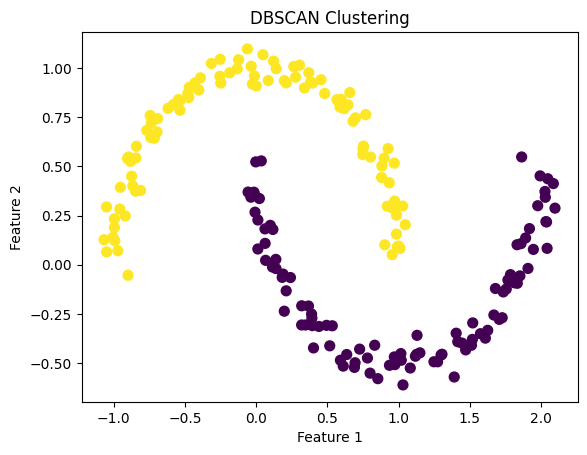

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data (moons shape)
X, _ = make_moons(n_samples=200, noise=0.05)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering')
plt.show()

2. HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)


HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that extends the concepts of DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to create a hierarchical clustering. HDBSCAN builds a tree-like structure to represent the clustering, allowing for the extraction of clusters at various levels of granularity.
How it Works:
High Level Overview:
HDBSCAN is an extension of DBSCAN. Instead of just grouping points into clusters, it also figures out the density of points in the clusters. Think of it as finding clusters of different sizes and shapes, not just circles. It looks at the varying density in different areas and creates a hierarchy of clusters, which means it can find clusters within clusters.
How it actually works :
Density Estimation: HDBSCAN starts by calculating the density of data points in the dataset. Density is a measure of how closely packed the points are in a given area.
Constructing a Hierarchy of Clusters: HDBSCAN then constructs a hierarchy of clusters using a technique called "condensed tree" or "minimum spanning tree." This tree helps in identifying clusters and their sub-clusters at different density levels.
Cluster Formation: HDBSCAN examines the condensed tree to determine the most stable and prominent clusters in the data. It does this by identifying branches in the tree where clusters naturally form.
Determining Cluster Assignments: The algorithm then chooses the clusters that maximize stability and represent meaningful structures in the data. It assigns data points to these clusters, including noise points that do not belong to any cluster.
Result: The result is a set of clusters, including sub-clusters, and the assignment of each data point to a specific cluster or as noise.
Example:
Let's consider a simple example using geographical coordinates (latitude and longitude) to demonstrate how HDBSCAN works.
Imagine you have a dataset of locations representing different places people visit in a city. Each data point has latitude and longitude information. We want to group these locations into meaningful clusters.
Step 1: Density Estimation
HDBSCAN calculates the density of points in different areas. High density areas indicate potential cluster centers.
Step 2: Constructing a Hierarchy of Clusters
It constructs a hierarchy of clusters based on the density, forming a tree-like structure to represent different levels of clustering.
Step 3: Cluster Formation
It identifies stable and prominent clusters from the tree structure, determining where clusters naturally form.
Step 4: Determining Cluster Assignments
Assigns data points to these clusters, including identifying noise points that don't belong to any cluster.
Example Data Points:
Let's say we have 10 data points representing popular locations in a city (latitude, longitude):
- Location 1: (40.748817, -73.985428) (Times Square)
- Location 2: (40.712776, -74.005974) (Statue of Liberty)
- Location 3: (34.052235, -118.243683) (Hollywood Walk of Fame)
- ...
- Location 10: (41.878113, -87.629799) (Millennium Park, Chicago)
Result:
HDBSCAN might identify clusters such as "Tourist Spots", "Historical Places", and "Parks". It would assign each location to the most appropriate cluster based on the density of points in those areas. Additionally, it could identify some locations as noise if they don't fit well into any cluster.
The beauty of HDBSCAN is that it can discover clusters even if they have different shapes and sizes, making it ideal for real-world datasets where clusters may not be well-defined or have varying densities.
Advantages:
Automatic Cluster Detection: HDBSCAN automatically finds clusters without needing the number of clusters as an input, making it convenient and intuitive.
Handles Varying Density Data: It effectively handles clusters with varying densities, making it more robust in real-world data scenarios.
Produces a Hierarchy of Clusters: HDBSCAN provides a hierarchical clustering, allowing for a detailed exploration of cluster relationships at different levels.
Disadvantages:
Computational Complexity: HDBSCAN can be computationally intensive and slower compared to traditional clustering algorithms, especially for large datasets.
Sensitivity to Parameters: Although less sensitive than DBSCAN, HDBSCAN still requires tuning of parameters, such as the minimum cluster size and distance metric.
When to Use DBSCAN
1. Irregularly Shaped Clusters: Use DBSCAN when dealing with data that forms irregularly shaped clusters or when you suspect the clusters in your data may have arbitrary shapes.
2. Presence of Noise and Outliers: DBSCAN is great for handling noise and identifying outliers as it considers points that don't belong to any cluster as noise.
3. No Predefined Number of Clusters: When you don't know the number of clusters in advance or want the algorithm to determine it automatically, DBSCAN is a good choice.
4. Spatial Data Analysis: DBSCAN is highly effective for spatial data analysis, such as geographical data, customer location data, and other applications with spatial characteristics.
When to Use HDBSCAN
1. Automatic Cluster Detection and Hierarchy: HDBSCAN is suitable when you want the algorithm to automatically detect clusters and provide a hierarchical representation, offering insights into cluster relationships.
2. Clusters with Varying Densities: HDBSCAN is effective for data with clusters of varying densities, making it a good choice for real-world datasets where clusters may have different densities.
3. No Predefined Number of Clusters: Like DBSCAN, HDBSCAN is suitable when you don't know the number of clusters in advance and want the algorithm to determine it automatically.
4. Efficient Exploration of Clusters at Different Granularities: HDBSCAN is useful when you want to explore clusters at various levels of detail, from broad cluster groupings to fine-grained sub-clusters.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.6 MB/s eta 0:00:00


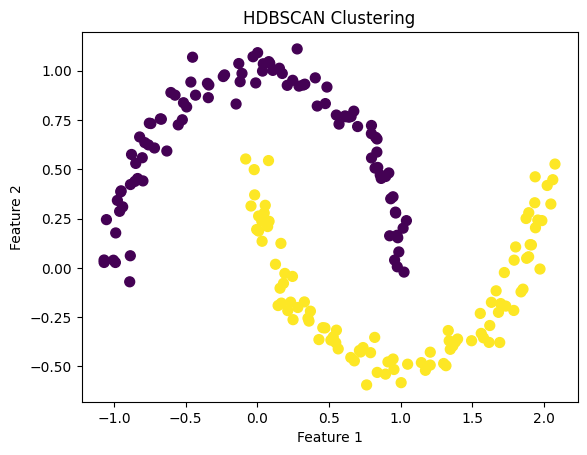

In [ ]:
!pip install hdbscan

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import hdbscan

# Generate synthetic data (moons shape)
X, _ = make_moons(n_samples=200, noise=0.05)

# Apply HDBSCAN
hdbscan_clusterer = hdbscan.HDBSCAN(min_samples=5, gen_min_span_tree=True)
y_hdbscan = hdbscan_clusterer.fit_predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hdbscan, cmap='viridis', marker='o', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('HDBSCAN Clustering')
plt.show()

Model-Based Clustering Algorithms
Model-based clustering algorithms provide a robust approach to uncovering hidden patterns and structures within datasets. These methods aim to identify clusters by assuming a specific statistical model for the data.
Understanding Model-Based Clustering Algorithms

Model-based clustering algorithms, like Gaussian Mixture Models, start by assuming that the data is generated from a mixture of several probability distributions. These distributions can be Gaussian (bell-shaped curves) or others, depending on the specific model. The algorithm iteratively fits these distributions to the data, adjusting parameters to maximize the likelihood of the observed data given the model.
High Level Overview:
Imagine you have a bunch of different colored marbles, but you don't know how many colors there are or how many marbles of each color. GMM helps you guess how many colors there might be and how many marbles belong to each color group.
It's like saying, "Hmm, there might be three main colors of marbles, and I think most marbles are either red, blue, or green." But we're not completely sure, so we imagine that each color is represented by a bell-shaped curve (like a hill), and marbles are more likely to be found where the hills are tall.
GMM helps us adjust these hills (or bell curves) until they best match the actual marbles we have. The hills' positions and sizes tell us about the colors and how many marbles belong to each color group.
Working of Gaussian Mixture Models (GMM)
1. Initialization:
 - Start by randomly initializing the parameters: means, covariances, and weights of each Gaussian component.
2. Expectation-Maximization (EM) Algorithm:
 - E-step (Expectation): Estimate the probability that each data point belongs to each Gaussian component using the current parameters.
 - M-step (Maximization): Update the parameters (means, covariances, and weights) to maximize the likelihood based on the estimated probabilities.
3. Convergence:
 - Iterate the E-step and M-step until the algorithm converges, i.e., the parameters no longer change significantly.
Example: Customer Segmentation using GMM
Let's say we have data on customer spending habits, considering two features: Monthly Income and Monthly Spending. We want to segment customers into distinct groups based on their spending patterns.
Initialization:Randomly initialize the mean, covariance, and weight parameters for two Gaussian components(Monthly Income and Monthly Spending).
Expectation-Maximization:E-step: Calculate the probability of each customer belonging to each Gaussian component. M-step: Update the mean, covariance, and weight of each Gaussian based on the calculated probabilities.
Convergence:Repeat the E-step and M-step until the parameters stabilize.
Result:GMM will converge and provide clusters based on spending patterns, helping us identify different customer segments.
Python Code: Implementing Gaussian Mixture Models (GMM)

Advantages:
- Flexible Cluster Shapes: Can model various cluster shapes and sizes.
- Probabilistic Cluster Assignment: Provides probabilities of data point assignment to each cluster.
- Well-Studied Theoretical Framework: Grounded in solid statistical theory.
Disadvantages:
- Sensitive to Initialization: Results can vary based on the initial parameter estimates.
- Computationally Intensive: Can be slow for large datasets or high-dimensional data.
- Assumption of Model: Assumes a specific probability distribution (e.g., Gaussian) for the data, which may not always hold true.
When to Use Model-Based Clustering Algorithms
- When Data Follows a Specific Distribution: If you suspect your data is generated from a mixture of specific probability distributions.
- Variable Cluster Shapes and Sizes: When clusters in the data have varying shapes and sizes that other algorithms struggle to capture.
- Probabilistic Assignment: When you need probabilistic cluster assignment for each data point.
- Well-Understood Theoretical Framework: In academic or research scenarios where a strong theoretical foundation is necessary.

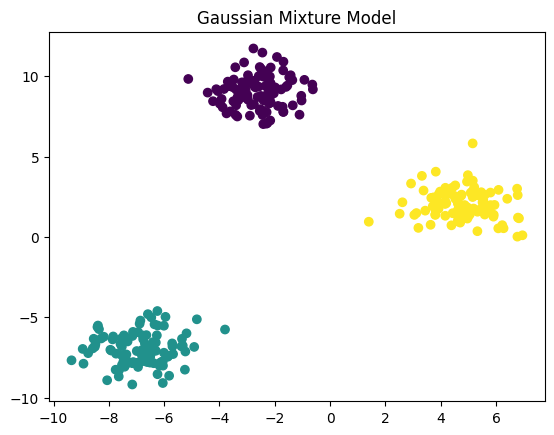

In [ ]:
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt

import numpy as np

# Create a synthetic dataset

np.random.seed(0)

X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Gaussian Mixture Model

gmm = GaussianMixture(n_components=3, random_state=42)

gmm_labels = gmm.fit_predict(X)

# Plot the results

plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')

plt.title('Gaussian Mixture Model')

plt.show()

Recent Advances : Spectral, Affinity Propagation, and OPTICS
1. Spectral Clustering: Dissecting Connectivity through Graph Theory
Watch Video
Spectral Clustering leverages graph theory to dissect the connectivity of data points. It forms a graph where data points are connected based on their similarity, allowing for the identification of clusters. By analyzing the eigenvectors of the graph Laplacian matrix, it can segregate the data into distinct groups. This method is especially effective for non-convex and arbitrarily shaped clusters.

High Level Overview:
Imagine you have a bunch of friends, and you want to group them based on their friendship circles. Spectral clustering is like finding the best way to organize them into different friend groups.
First, you draw lines connecting friends who are really close. These lines represent how strong their friendship is. Some friends might have more lines, meaning they're friends with lots of others.
Next, you look at these lines and see which friends are more connected to each other. Spectral clustering helps you find these friend groups by looking at how these lines are arranged and how many friends are connected to each other.
It's like saying, "Let's find the groups where friends are tightly connected within the group but not so much with friends in other groups." This helps us figure out the best way to organize our friends into different clusters.
🔧 How it Works:
 - Construct an affinity matrix based on data point similarity.
 - Form a graph where nodes represent data points.
 - Compute eigenvectors of the Laplacian matrix.
 - Use K-means or other clustering techniques on the obtained eigenvectors.
Advantages:
Effectiveness with Complex Shapes: Spectral Clustering can handle clusters with non-convex shapes and varying sizes effectively.
Spectral Embedding: It leverages spectral embedding, which often preserves global data structures well.
Consistency with Graph Theory: The graph-based approach aligns well with real-world scenarios, where relationships are often graph-like.
Disadvantages:
Sensitivity to Parameters: The choice of parameters, such as the number of clusters (K), can significantly impact the results.
Computationally Intensive: Spectral Clustering can be computationally demanding, especially for large datasets.
Scalability Issues: It may struggle with scalability for very large datasets due to the computation of the affinity matrix and eigenvectors.
When to Use:
Data with Complex Structures: When the clusters have intricate shapes and structures that traditional algorithms struggle to capture.
Image Segmentation: Ideal for image segmentation where objects can have diverse shapes and sizes.
Social Network Analysis: Useful for community detection in social networks where relationships are naturally represented as graphs.


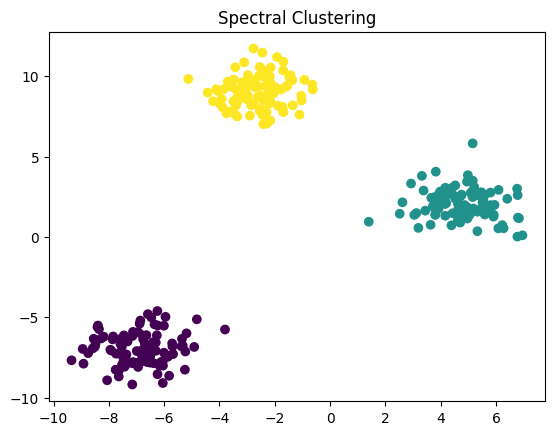

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, assign_labels='discretize', random_state=42)
spectral_labels = spectral.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis')
plt.title('Spectral Clustering')
plt.show()

2. Affinity Propagation (AP)
Watch Video first then read for better clarity.
Affinity Propagation (AP) is a clustering algorithm that identifies 'exemplars' in the data, representing the centers of clusters. It doesn't require specifying the number of clusters in advance.
High level Overview:
Imagine you have a bunch of friends, and they need to decide who will be the leader of each group. Affinity propagation is like a game where they pass messages to figure it out.
Each friend starts by saying, "Hey, I think I should be the leader!" Then they send messages to all their friends, saying how well-suited they are to be the leader.
Friends keep passing messages back and forth, considering their own abilities and their friends' opinions. They adjust their ideas based on what they hear.
After a bunch of message-passing rounds, a friend might say, "You know what, I'm the best fit to be the leader for this group," and others might agree.
In the end, each group has its own leader, the friend who convinced everyone they're the best fit.

Let's walk through how Affinity Propagation works with a simple example.
Working of Affinity Propagation: Step-by-Step Explanation
1. Similarity Matrix:
- Compute a similarity matrix that quantifies the similarity between each pair of data points. The similarity can be measured using various metrics like Euclidean distance, cosine similarity, etc.
2. Availability and Responsibility Matrices:
- Initialize two matrices:
 - Responsibility ($r$) Matrix: Represents the 'responsibility' of data point $i$ to act as an exemplar for data point $j$.
 - Availability ($a$) Matrix: Indicates the 'availability' of data point $j$ to pick data point $i$ as its exemplar.
 3. Message Passing:
- Iteratively update the responsibility and availability matrices using message passing:

4. Exemplar Selection:
- Identify exemplars based on the availability matrix:

Example: Customer Segmentation using Affinity Propagation
Let's consider we have customer data based on two features: Monthly Income and Monthly Spending. We want to segment customers into distinct groups based on their spending patterns.
1. Similarity Matrix:
 - Compute the similarity matrix using, for example, negative squared Euclidean distance.
2. Message Passing:
 - Iterate through updating the responsibility and availability matrices until convergence.
3. Exemplar Selection:
 - Data points that become exemplars represent the centers of clusters.
Advantages of Affinity Propagation:
- Automatically Determines Clusters: Identifies the number of clusters automatically.
- Robust to Outliers: Robust to noise and outliers due to the message passing mechanism.
- Flexible Cluster Size: Can discover clusters of varying sizes.
Disadvantages of Affinity Propagation:
- Memory and Time Complexity: Can be computationally intensive, especially for large datasets due to its quadratic time complexity.
- Difficulty in Tuning Parameters: Choosing the damping factor and preference parameter can be challenging.
When to Use Affinity Propagation:
- Number of Clusters Unknown: When the number of clusters is not known in advance.
- Natural Language Processing (NLP): Effective for clustering text data like clustering news articles or customer reviews.
- Biology and Medicine: Identifying disease subtypes based on patient data.


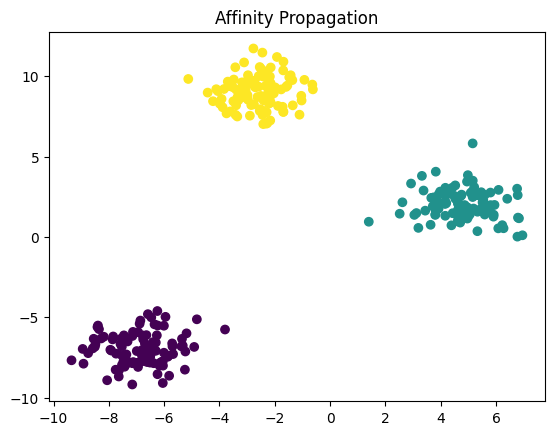

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Affinity Propagation
affinity_propagation = AffinityPropagation(damping=0.7)
affinity_labels = affinity_propagation.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=affinity_labels, cmap='viridis')
plt.title('Affinity Propagation')
plt.show()

3. OPTICS (Ordering Points To Identify the Clustering Structure): Unveiling Density-Based Patterns
Watch Video
OPTICS is a density-based clustering algorithm that uncovers clusters of varying densities and arbitrary shapes. It orders data points based on their density and proximity to each other. By analyzing the reachability plot, it identifies clusters and their hierarchical relationships, providing a comprehensive view of the data's clustering structure.

High Level Overview
Imagine you have a lot of mountains and hills of different heights, and you want to figure out which ones are the tallest and how they're all connected.
OPTICS (Ordering Points To Identify the Clustering Structure) is like exploring these mountains and hills with binoculars. You start at a random point, look around, and if you see a taller hill nearby, you head in that direction.
As you move, you note down the heights of the hills you pass. OPTICS helps you create a list, ranking the hills from the tallest to the shortest as you explore.
Sometimes, you might find a flat area between two hills. OPTICS notices this and marks it as a valley. It tells you, "Hey, there's a flat part here!"
This way, OPTICS helps you understand the landscape of mountains and valleys, or in data terms, the structure of your data points. It helps you see which points are important and how they're connected.
🔧 How it Works:
 - Compute the reachability distance for each data point.
 - Create a reachability plot.
 - Identify clusters and their hierarchical relationships.
 - Extract meaningful clusters based on specified parameters.
Advantages:
Handles Various Densities: Can identify clusters of varying densities, making it robust in real-world scenarios.
Hierarchical Cluster Output: Provides a hierarchical clustering structure, aiding in understanding the data at different granularities.
Resistant to Noise: Resilient to noise and outliers due to its density-based nature.
Disadvantages:
Parameter Sensitivity: Sensitive to parameters such as the minimum number of samples and the reachability distance.
Computationally Intensive: The algorithm can be computationally demanding, especially for large datasets with high dimensions.
When to Use:
Data with Varied Density: When dealing with data that exhibits varying cluster densities and sizes.
Anomaly Detection: Useful in identifying anomalies or outliers in the data due to its noise-resistance properties.
Geographical Data Analysis: Effective in identifying spatial clusters based on geographical data.


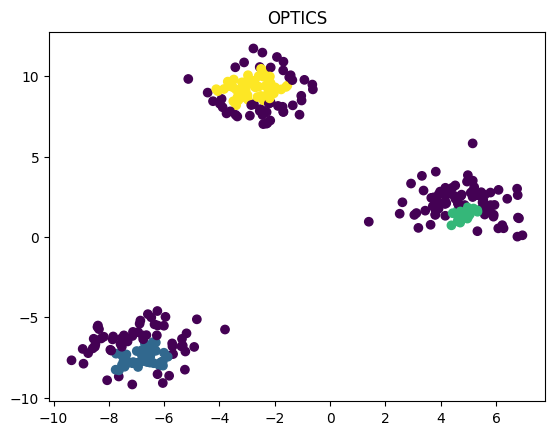

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# OPTICS
optics = OPTICS(min_samples=10, xi=0.05, min_cluster_size=0.05)
optics_labels = optics.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=optics_labels, cmap='viridis')
plt.title('OPTICS')
plt.show()

In [ ]:
# prompt: What are various type of clustering algorithms

# There's no Python code to directly list clustering algorithms,
# but here's a well-structured overview as a comment:

"""
Clustering Algorithms:

Partitioning Methods:
  - K-Means: Aims to partition data into k clusters by minimizing the sum of squared distances between data points and their cluster centers.
  - K-Medoids: Similar to K-Means, but uses actual data points as cluster centers (medoids).
  - Mini-Batch K-Means: A variant of K-Means that processes data in small batches, improving efficiency for large datasets.

Hierarchical Methods:
  - Agglomerative Clustering: Starts with each data point as a separate cluster and iteratively merges the closest clusters until a single cluster remains.
  - Divisive Clustering: Begins with all data points in a single cluster and recursively splits clusters until each data point forms its own cluster.

Density-Based Methods:
  - DBSCAN: Groups data points that are closely packed together, identifying clusters based on density.
  - HDBSCAN: An extension of DBSCAN that handles varying densities and identifies clusters of different shapes.
  - OPTICS: Orders data points based on density and proximity, allowing for the identification of clusters and their hierarchical relationships.

Model-Based Methods:
  - Gaussian Mixture Models (GMM): Assumes that the data is generated from a mixture of Gaussian distributions and aims to identify the parameters of these distributions.
  - Spectral Clustering: Leverages graph theory to identify clusters based on the connectivity of data points.
  - Affinity Propagation: Identifies exemplars (cluster centers) based on message passing between data points.

Fuzzy Clustering:
  - Fuzzy C-Means: Assigns data points to multiple clusters with varying degrees of membership.

Other Methods:
  - Mean Shift: Iteratively shifts data points towards regions of higher density to identify cluster centers.
  - BIRCH: An efficient algorithm for clustering large datasets by building a hierarchical data structure.
"""


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.12.3
    Uninstalling typer-0.12.3:
      Successfully uninstalled typer-0.12.3
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.13.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


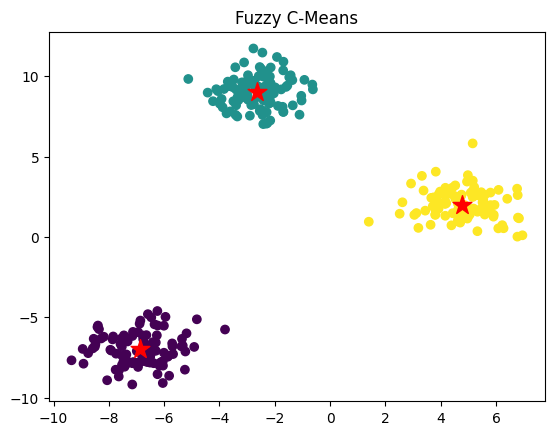

In [ ]:
# prompt: Fuzzy C-Means: Assigns data points to multiple clusters with varying degrees of membership with python code

!pip install fuzzy-c-means

from fcmeans import FCM
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Fuzzy C-Means
fcm = FCM(n_clusters=3)
fcm.fit(X)

# Get the cluster centers and membership probabilities
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)
fcm_membership = fcm.u

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=fcm_labels, cmap='viridis')
plt.scatter(fcm_centers[:, 0], fcm_centers[:, 1], marker='*', s=200, c='red')
plt.title('Fuzzy C-Means')
plt.show()


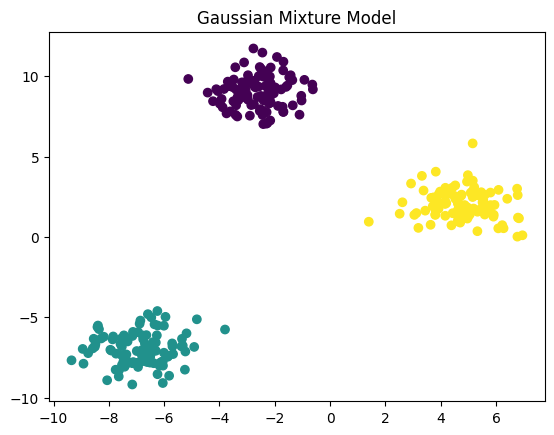

In [ ]:
# prompt:  Gaussian Mixture Models (GMM): Assumes that the data is generated from a mixture of Gaussian distributions and aims to identify the parameters of these distributions with python code

from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)

gmm_labels = gmm.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
plt.title('Gaussian Mixture Model')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


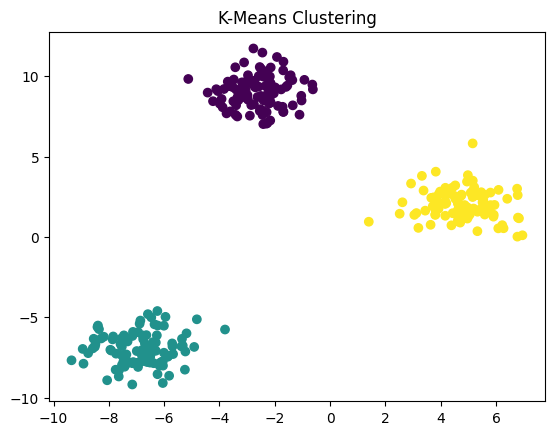

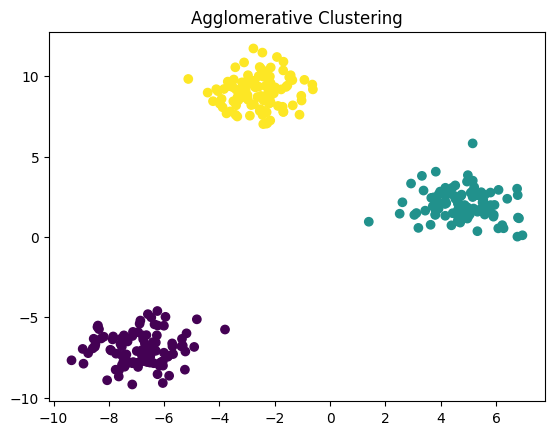

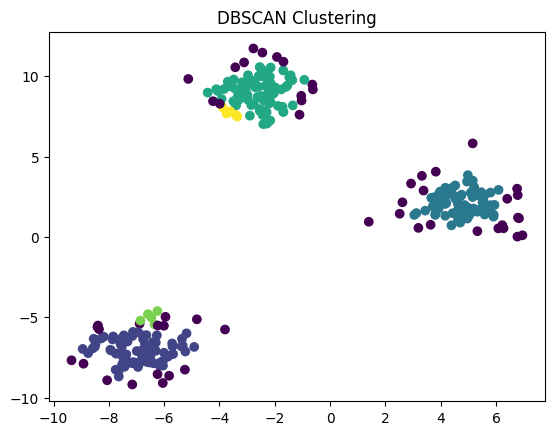

In [ ]:
# prompt: python code for clustring algorithm

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Plot K-Means results
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(X)

# Plot Agglomerative Clustering results
plt.scatter(X[:, 0], X[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Plot DBSCAN results
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


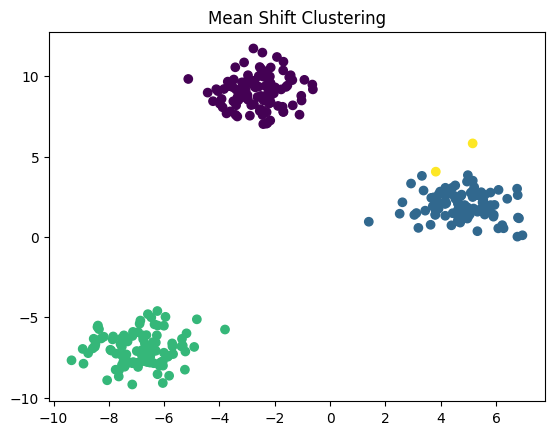

In [ ]:
# prompt:  Mean Shift: Iteratively shifts data points towards regions of higher density to identify cluster centers with python code

from sklearn.cluster import MeanShift, estimate_bandwidth

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

# Mean Shift Clustering
meanshift = MeanShift(bandwidth=bandwidth)
meanshift_labels = meanshift.fit_predict(X)

# Plot Mean Shift results
plt.scatter(X[:, 0], X[:, 1], c=meanshift_labels, cmap='viridis')
plt.title('Mean Shift Clustering')
plt.show()


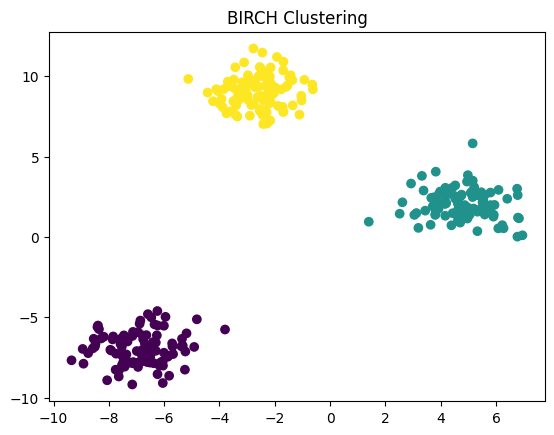

In [ ]:
# prompt: BIRCH: An efficient algorithm for clustering large datasets by building a hierarchical data structure with python code

from sklearn.cluster import Birch

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# BIRCH Clustering
birch = Birch(n_clusters=3)  # You can specify the number of clusters or let it determine automatically
birch_labels = birch.fit_predict(X)

# Plot BIRCH results
plt.scatter(X[:, 0], X[:, 1], c=birch_labels, cmap='viridis')
plt.title('BIRCH Clustering')
plt.show()


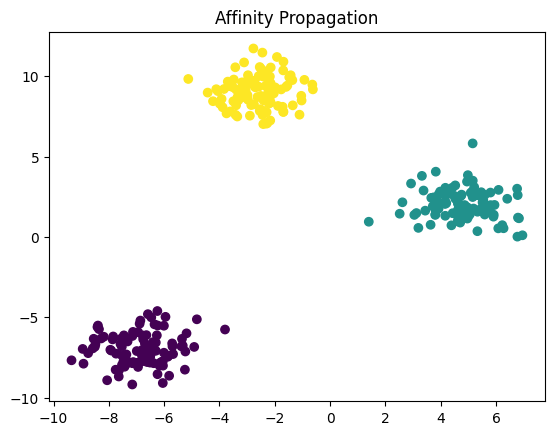

Exemplars:
[-6.7930374  -7.03578683]
[4.64512254 2.02015028]
[-2.70155859  9.31583347]


In [ ]:
# prompt: Affinity Propagation: Identifies exemplars (cluster centers) based on message passing between data points with python code

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Affinity Propagation
affinity_propagation = AffinityPropagation(damping=0.7)  # Adjust damping factor if needed
affinity_labels = affinity_propagation.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=affinity_labels, cmap='viridis')
plt.title('Affinity Propagation')
plt.show()

# Get the exemplar indices
exemplars = affinity_propagation.cluster_centers_indices_

# Print the exemplar data points
print("Exemplars:")
for i in exemplars:
  print(X[i])


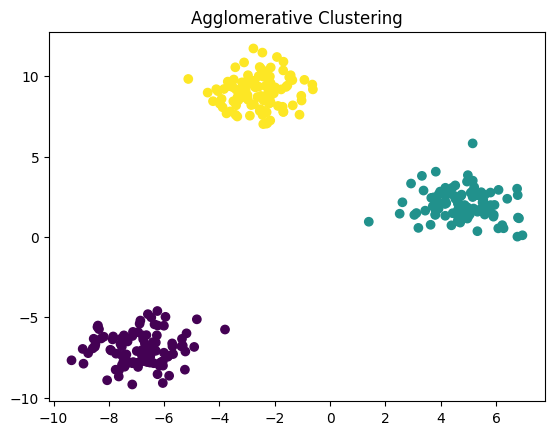

In [ ]:
# prompt: Agglomerative Clustering: Starts with each data point as a separate cluster and iteratively merges the closest clusters until a single cluster remains with python code

# Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(X)

# Plot Agglomerative Clustering results
plt.scatter(X[:, 0], X[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


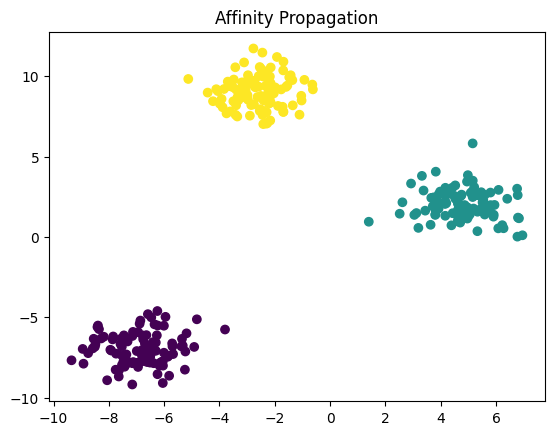

Exemplars:
[-6.7930374  -7.03578683]
[4.64512254 2.02015028]
[-2.70155859  9.31583347]


In [ ]:
# prompt: Affinity Propagation: Identifies exemplars (cluster centers) based on message passing between data points with python code

# Create a synthetic dataset
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Affinity Propagation
affinity_propagation = AffinityPropagation(damping=0.7)  # Adjust damping factor if needed
affinity_labels = affinity_propagation.fit_predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=affinity_labels, cmap='viridis')
plt.title('Affinity Propagation')
plt.show()

# Get the exemplar indices
exemplars = affinity_propagation.cluster_centers_indices_

# Print the exemplar data points
print("Exemplars:")
for i in exemplars:
  print(X[i])
